<a href="https://colab.research.google.com/github/eubrunoosouza/airbnb-exploratory-analysis/blob/main/PROJETO_AIRBNB_EDIMBURGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **An√°lise Explorat√≥ria de Dados**
*by [Bruno C. Souza](https://guarani.tech)*

---

# **An√°lise dos Dados do Airbnb (Edimburgo/Esc√≥cia).**

O [Airbnb](https://www.airbnb.com.br/) √© uma das **maiores empresas do ramo de hotelaria da atualidade**. O principal detalhe √© que ela, seguindo a mesma linha de outras gigantes da tecnologia, **n√£o possui nenhum hotel**!

O seu principal foco √© de conectar pessoas que querem viajar, e obviamente se hospedar, com anfitri√µes locais que desejam alugar os seus im√≥veis de maneira pr√°tica, sem tantas burocracias. O Airbnb fornece uma plataforma inovadora para realizar toda essa troca entre os *'hosts'* e os h√≥spedes.


Mais ou menos ao final do ano de 2018, a Startup fundada h√° cerca de 10 anos, j√° havia **hospedado mais de 300 milh√µes** de pessoas ao redor de todo o mundo, desafiando as redes tradicionais de hotelaria.


Uma iniciativa muito legal do Airbnb, √© a disponibiliza√ß√£o dos dados reais de algumas das principais cidades do mundo, provenientes de sua plataforma. Isto √© poss√≠vel por meio do **portal:** [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde se √© poss√≠vel fazer o **download direto** de uma grande quantidade de dados para desenvolver projetos e solu√ß√µes de *Data Science*. 

*Este projeto s√≥ foi poss√≠vel gra√ßas a esta iniciativa! Thanks!*


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

---

## **Por que Edimburgo e n√£o outra cidade?**

A escolha desta cidade em particular, dentre tantas outras disponibilizadas pelo [portal do Airbnb](http://insideairbnb.com/get-the-data.html/), foi motivada pelo simples fato de estar realizando, no momento de elabora√ß√£o deste projeto, um curso de **teoria musical** √† dist√¢ncia, pela **University of Edinburgh**. Decidir unir o √∫til ao agrad√°vel, pois al√©m de ***Engenheiro*** e ***Cientista de dados J√∫nior***, tamb√©m sou ***m√∫sico***, e isso ***h√° mais de 10 anos***. 

Amo m√∫sica cl√°ssica, por conta da dificuldade mesmo, e em meu tempo livre estudo piano. Percebo que isto agu√ßa minha mente e melhora meu *foco, concentra√ß√£o e coordena√ß√£o motora*.<br><br>

<img alt="Colaboratory logo" width="80%" src="https://github.com/eubrunoosouza/airbnb-exploratory-analysis/blob/main/EDIMBURGO%20(1).png?raw=true">


## **Como os dados foram obtidos?**


Todos os dados que ser√£o utilizados neste projeto de an√°lise expolat√≥ria foram obtidos pelo site: [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

*Para esta an√°lise inicial, ser√° baixado apenas o seguinte arquivo:*

`listings.csv` - Summary information and metrics for listings in Edinburgh (good for visualisations).<br><br>


> **IMPORTANTE:** O portal est√° em constante atualiza√ß√£o, e em determinado momento, pode ser que o conjunto de dados exato utilizado neste notebook n√£o esteja mais dispon√≠vel, o que quebraria nosso c√≥digo.


Pensando nisso, disponibilizei aqui o conjunto de dados que foram utilizados, para que voc√™ sempre consiga utilizar esse material.<br><br>


Com isso tudo em mente, vamos iniciar esta **an√°lise exporat√≥ria**!


In [1]:
# importando a biblioteca geoespacial "folium".

!pip install folium

In [2]:
# importar os pacotes necess√°rios.

import folium
import pandas as pd
from folium import plugins
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importar o arquivo listings.csv para um DataFrame.

df = pd.read_csv('https://www.dropbox.com/s/uw7kzs25e0wn7iu/listings.csv?dl=1')

## **An√°lise dos Dados Brutos**

Esta etapa inicial tem por objetivo explorar o *dataset* e extrair informa√ß√µes iniciais, a fim de termos no√ß√£o situacional dos dados brutos. A forma como est√£o distribu√≠dos, dimensionalidade etc.<br><br>

Primariamente, gostaria de apresentar um **sum√°rio b√°sico** das vari√°veis presentes nesta base de dados:<br><br>


**DICION√ÅRIO DE VARI√ÅVEIS:**

* `id` - n√∫mero de id gerado para identifica√ß√£o do im√≥vel.
* `name` - descri√ß√£o do nome do im√≥vel anunciado na plataforma do AirBnB.
* `host_id` - n√∫mero de id do propriet√°rio(anfitri√£o) do im√≥vel.
* `host_name` - nome do anfitri√£o do im√≥vel.
* `neighbourhood_group` - esta coluna n√£o cont√©m nenhum valor v√°lido.
* `neighbourhood` - nome do bairro/vizinha√ßa da localidade.
* `number_of_reviews` - n√∫mero total de avalia√ß√µes.
* `number_of_reviews_ltm` - n√∫mero de avalia√ß√µes (√∫ltimos 12 meses).
* `latitude` - coordenada da latitude da propriedade.
* `license` - licen√ßa, n√∫mero de registro.
* `longitude` - coordenada de longitude da propriedade.
* `room_type`	- informa√ß√£o sobre o tipo de quarto oferecido.
* `price` - pre√ßo de aluguel do im√≥vel.
* `minimum_nights` - quantidade de noites min√≠mas de acomoda√ß√£o.
* `last_review`	- data da √∫ltima avalia√ß√£o do im√≥vel.
* `reviews_per_month` - n√∫mero de reviews por m√™s.
* `calculated_host_listings_count` - quantidades de propriedades de um mesmo anfitri√£o.
* `availability_365` - n√∫meros de dias de disponibilidade para aluguel do im√≥vel dentro de 365 dias.<br><br>

Antes de tudo, √© bem importante verificarmos a 'cara' do nosso *dataset*, **analisando as 5 primeiras entradas**.<br><br>

Vamos l√°!

In [4]:
# mostrar as 5 primeiras entradas

df.head()

id  ... license
0  15420  ...     NaN
1  24288  ...     NaN
2  38628  ...     NaN
3  44552  ...     NaN
4  54188  ...     NaN

[5 rows x 18 columns]

### **Quantos atributos (vari√°veis) e entradas o dataset possui? E os tipos?**

Bom, vamos ver ent√£o quantas **entradas**(*leia-se linhas*) o nosso _dataset_ possui, e tamb√©m vamos verificar as **colunas** presentes.

Vale ressaltar que este dataset que estamos utilizando √© uma vers√£o **"resumida"** do *Airbnb*. No mesmo portal do *Airbnb*, onde baixamos o arquivo `listings.csv`, h√° tamb√©m uma vers√£o mais completa a: `listings.csv.gz`. Uma vers√£o mais robusta e com mais vari√°veis.

In [5]:
# identificar o volume de dados do DataFrame

print("O dataset possui:\t {} entradas".format(df.shape[0]))
print("O dataset possui:\t {} vari√°veis\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

O dataset possui:	 6146 entradas
O dataset possui:	 18 vari√°veis



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

√â preciso se fazer uma an√°lise preliminiar, ap√≥s a importa√ß√£o do dataset, a fim de mapear os dados ausentes ou nulos. Com isso em m√£os, temos uma no√ß√£o melhor da qualidade do _dataset_. 

**_Abaixo vamos observar as porcentagens dos dados nulos, por coluna, em rela√ß√£o ao total de entradas._**



*   √â poss√≠vel ver que as colunas `neighbourhood_group` e `license`possuem **100%** dos seus valores ausentes, nulos.
*   Logo em seguida temos que as vari√°veis `last_review` e `reviews_per_month` possuem pouco mais do que **10%** de seus valores nulos.
*   A vari√°vel `host_name` possui uma quantidade muito pequena de dados ausentes.





In [6]:
# ordenar em ordem decrescente as vari√°veis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.111292
last_review                       0.111292
host_name                         0.000325
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Como as vari√°veis num√©ricas est√£o distribuidas?** 

Para ter uma visualiza√ß√£o inicial da forma como as vari√°veis num√©ricas se distribuem, irei plotar um *histograma* das vari√°veis num√©ricas.

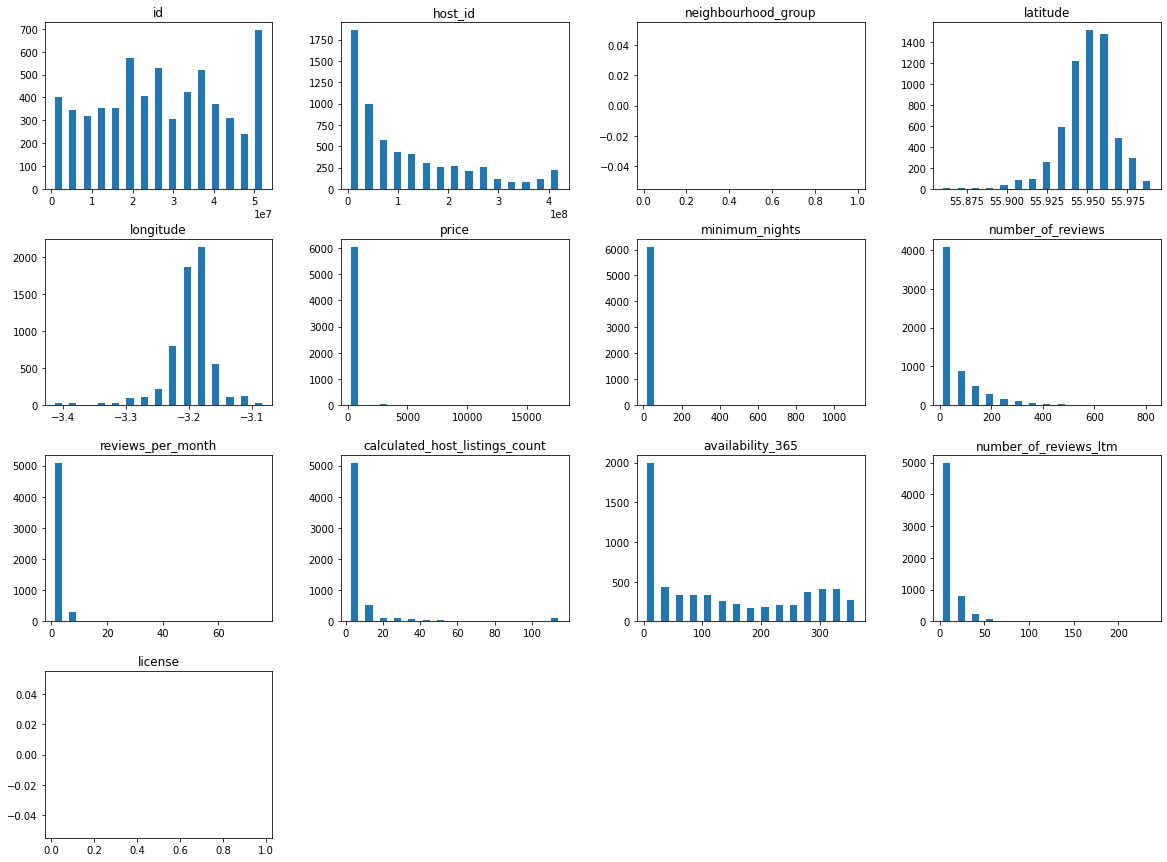

In [7]:
# plotar o histograma das vari√°veis num√©ricas

df.hist(bins=15, grid=False, figsize=(20,15), zorder=2, rwidth=0.5);

### **Conclus√µes preliminares ap√≥s plotagem do histograma:**

*   A coluna `minimum_nights` e `price`, que representam respectivamente o **n√∫mero m√≠nimo de noites** e o **pre√ßo de aluguel**, ambas possuem uma distribui√ß√£o bem at√≠pica, iremos verificar isto melhor a seguir.


## **Verifica√ß√£o de valores muito discrepantes, os chamados '*OUTLIERS*'.**

Verificar os outliers √© uma etapa de extrema import√¢ncia, pois eles podem **comprometer** e **enviesar** a nossa an√°lise explorat√≥ria, fazendo com que cheguemos √† conclus√µes equivocadas sobre os dados.

In [8]:
# verifica√ß√£o de outliers

df[['price','minimum_nights','number_of_reviews','reviews_per_month',
   'calculated_host_listings_count','availability_365']].describe()

price  ...  availability_365
count   6146.000000  ...       6146.000000
mean     184.488773  ...        131.059551
std      729.983800  ...        125.357151
min        0.000000  ...          0.000000
25%       58.000000  ...          2.000000
50%       89.000000  ...         94.000000
75%      135.000000  ...        258.000000
max    17921.000000  ...        365.000000

[8 rows x 6 columns]

### **Conclus√µes preliminares:**
Olhando o resumo estat√≠stico acima, podemos confirmar a exist√™ncia de outliers e podemos levantar algumas hip√≥teses como:

*   A vari√°vel `price` possui **75%** do valor abaixo de **135**, por√©m o seu valor m√°ximo √© de **17921**.
*   A quantidade m√≠nima de noites (`minimum_nights`) est√° acima de **365 dias** no ano. Mais precisamente **1124 noites**.<br><br>

Para tratar os **outliers** presentes no _dataset_, os seguintes passos ser√£o adotados:

1.   _Definir o **Q1** e **Q3** para as vari√°veis que ser√£o limpas._
2.   _Calcular o **IQR** para as vari√°veis._
3.   _Definir o limite **superior** e **inferior** para cortar os outliers._
4.   _Remover os **outliers**._


## Identificando os outliers e plotagem de boxplot para `price`.

Iniciaremos com uma verifica√ß√£o os limites para `price` e, com um gr√°fico do tipo boxplot, iremos analisar visualmente os *outliers* presentes na distribui√ß√£o da vari√°vel.


In [9]:
# identificando outliers para os pre√ßos(price).

q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

print('IQR da vari√°vel price √© {} '.format(IQR_price))

# definindo os limites para price.

superior_limit_price = q3_price + 1.5 * IQR_price
inferior_limit_price = q1_price - 1.5 * IQR_price

print('O limite superior para price √©: {}'.format(superior_limit_price))
print('O limite inferior para price √©: {}'.format(inferior_limit_price))

IQR da vari√°vel price √© 77.0 
O limite superior para price √©: 250.5
O limite inferior para price √©: -57.5


O dataset em quest√£o possui 6146 entradas no total.
481 entradas est√£o acima do limite superior de 250.5 para a variavel 'price'.
Isto corresponde a 7.83% das entradas da coluna em rela√ß√£o ao total.



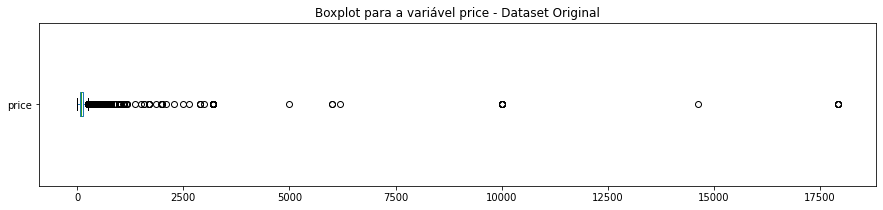

In [10]:
# plotagem de gr√°fico do tipo boxplot para 'price'.

fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Boxplot para a vari√°vel price - Dataset Original')

# ver a quantidade de valores acima do limite superior para price

print("O dataset em quest√£o possui {} entradas no total.".format(df.shape[0]))

print("{} entradas est√£o acima do limite superior de {} para a variavel 'price'."
      .format(len(df[df.price > superior_limit_price]),superior_limit_price))

print("Isto corresponde a {:.2f}% das entradas da coluna em rela√ß√£o ao total.\n"
      .format((len(df[df.price > superior_limit_price]) / df.shape[0])*100))

## Identificando os outliers e plotagem de boxplot para `minimum_nights`.

Assim como foi feito para a vari√°vel `price`, tamb√©m iremos verificar os limites para `minimum_nights`, e com um gr√°fico do tipo boxplot, iremos analisar visualmente os outliers presentes na distribui√ß√£o da vari√°vel em quest√£o.



In [11]:
# identificando outliers para minimum_nights.

q1_min_nights = df.minimum_nights.quantile(.25)
q3_min_nights = df.minimum_nights.quantile(.75)
IQR_min_nights = q3_min_nights - q1_min_nights

print('IQR da vari√°vel minimum_nights √© {} '.format(IQR_min_nights))

# definindo os limites para minimum_nights.    

sup_limit_min_nights = q3_min_nights + 1.5 * IQR_min_nights
inf_limit_min_nights = q1_min_nights - 1.5 * IQR_min_nights

print('O limite superior para price √©: {}'.format(sup_limit_min_nights))
print('O limite inferior para price √©: {}'.format(inf_limit_min_nights))

IQR da vari√°vel minimum_nights √© 2.0 
O limite superior para price √©: 6.0
O limite inferior para price √©: -2.0


O dataset possui 6146 entradas no total
310 entradas est√£o acima do limite superior de 6.0
Isto corresponde a 5.04% do nosso dataset.



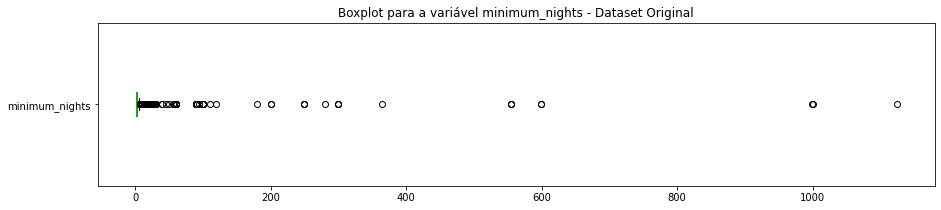

In [12]:
# plotagem de gr√°fico do tipo boxplot para 'minimum_nights'.

fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Boxplot para a vari√°vel minimum_nights - Dataset Original')

# ver a quantidade de valores acima do limite superior para minimum_nights.

print("O dataset possui {} entradas no total".format(df.shape[0]))
print("{} entradas est√£o acima do limite superior de {}".format(len(df[df.minimum_nights 
      > sup_limit_min_nights]),sup_limit_min_nights))
print("Isto corresponde a {:.2f}% do nosso dataset.\n".format((len(df[df.minimum_nights 
      > sup_limit_min_nights]) / df.shape[0])*100))


## **Limpeza dos Dados**

√â importante pontuar que as colunas com **baixo poder preditivo** e **grande quantidade de dados faltantes** podem ser exclu√≠das. 

Este √© o caso das vari√°veis: `neighbourhood_group`, `license`, `reviews_per_month` e `last_review`.

***Vamos prosseguir com a limpeza destes dados.***


In [13]:
# eliminando colunas com dados nulos n√£o relevantes

df_clean = df.copy()
df_clean.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

# removendo os outliers

df_clean.drop(df_clean[df_clean.minimum_nights > sup_limit_min_nights].index, 
              axis=0, inplace=True)

df_clean.drop(df_clean[df_clean.price > superior_limit_price].index, 
              axis=0, inplace=True)


# verifica√ß√£o de dados nulos ap√≥s limpeza inicial

display(df_clean.isnull().sum().sort_values(ascending=False) / df_clean.shape[0])


reviews_per_month                 0.091568
last_review                       0.091568
host_name                         0.000371
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64



> Optei por remover os valores nulos em `reviews_per_month, last_review e host_name`, pois estes dados s√£o irrelevantes para esta minha an√°lise explorat√≥ria.



In [14]:
# limpando os dados nulos faltantes

df_clean.dropna(axis=0, inplace=True)

# verifica√ß√£o final da limpeza do dataset

display(df_clean.isnull().sum().sort_values(ascending=False) / df_clean.shape[0])

number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

In [15]:
# verificando o tamanho da redu√ß√£o do dataset ap√≥s a limpeza

reducao_de_entradas = ((df.shape[0] - df_clean.shape[0]) / df.shape[0])*100
reducao_de_variaveis = ((df.shape[1] - df_clean.shape[1]) / df.shape[1])*100

print('Antes da limpeza t√≠nhamos: {} entradas e {} vari√°veis.'
      .format(df.shape[0], df.shape[1]))

print('Ap√≥s a limpeza ficamos com: {} entradas e {} vari√°veis.\n'
      .format(df_clean.shape[0], df_clean.shape[1]))

print('Houve uma redu√ß√£o percentual de {:.2f}% nas entradas.'
      .format(reducao_de_entradas))

print('Houve uma redu√ß√£o percentual de {:.2f}% nas vari√°veis.'
      .format(reducao_de_variaveis))

Antes da limpeza t√≠nhamos: 6146 entradas e 18 vari√°veis.
Ap√≥s a limpeza ficamos com: 4890 entradas e 16 vari√°veis.

Houve uma redu√ß√£o percentual de 20.44% nas entradas.
Houve uma redu√ß√£o percentual de 11.11% nas vari√°veis.


## **Resumo do que foi feito nesta limpeza**

1. Removemos as colunas `license` e `neighbourhood_group`, pelo fato delas n√£o serem relevantes para a an√°lise explorat√≥ria e tamb√©m por estarem com **100%** dos valores ausentes.

2. Foram removidos os outliers presentes em `minimum_nights` e `price`.
3. Remo√ß√£o dos valores nulos em `reviews_per_month, last_review e host_name`, pois estes dados s√£o irrelevantes.


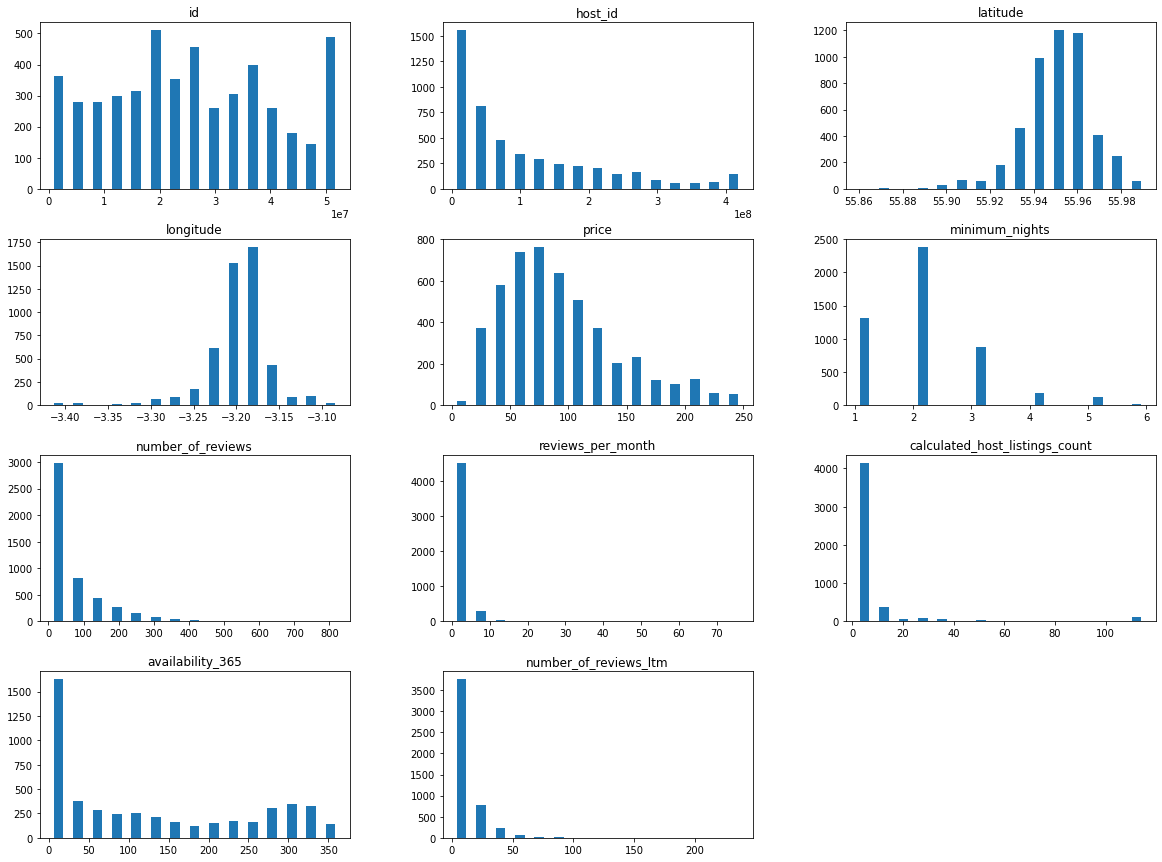

In [16]:
# plotando  o histograma das vari√°veis num√©ricas ap√≥s a limpeza

df_clean.hist(bins=15, grid=False, figsize=(20,15), zorder=2, rwidth=0.5);

## **Plotagem de boxplots ap√≥s a limpeza e remo√ß√£o de outliers**

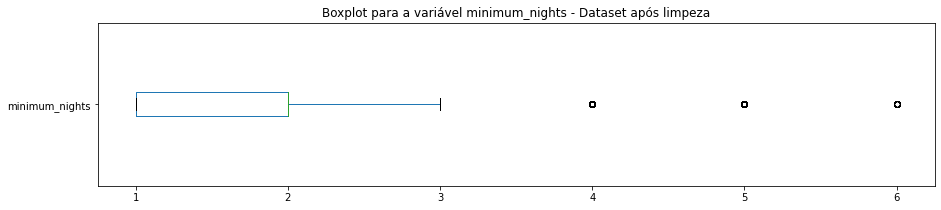

In [17]:
# plotagem de gr√°fico do tipo boxplot para 'minimum_nights'.

fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Boxplot para a vari√°vel minimum_nights - Dataset ap√≥s limpeza');

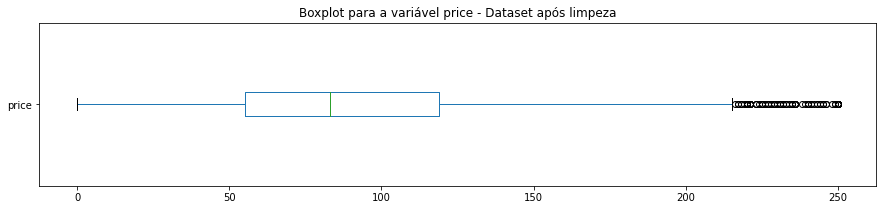

In [18]:
# plotagem de gr√°fico do tipo boxplot para 'price'.

fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Boxplot para a vari√°vel price - Dataset ap√≥s limpeza');

### **Qual seria m√©dia dos pre√ßos de aluguel em Edimburgo?**

Ap√≥s todo este processo de limpeza, podemos verificar a m√©dia de pre√ßos em libras na cidade.

In [19]:
# ver a m√©dia da coluna `price`

media_de_precos = df_clean.price.mean()

print("A m√©dia de pre√ßos dos alugu√©is √© de ¬£{:.2f}".format(media_de_precos))


A m√©dia de pre√ßos dos alugu√©is √© de ¬£91.92


### **Qual a correla√ß√£o que existe entre as vari√°veis?**

Agora iremos verificar a correla√ß√£o das vari√°veis presentes no dataset.

In [20]:
# criar uma matriz de correla√ß√£o
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correla√ß√£o
display(corr)


price  ...  availability_365
price                           1.000000  ...          0.161741
minimum_nights                  0.128330  ...         -0.125296
number_of_reviews              -0.081695  ...          0.076587
reviews_per_month              -0.023945  ...          0.045600
calculated_host_listings_count  0.155458  ...          0.142033
availability_365                0.161741  ...          1.000000

[6 rows x 6 columns]

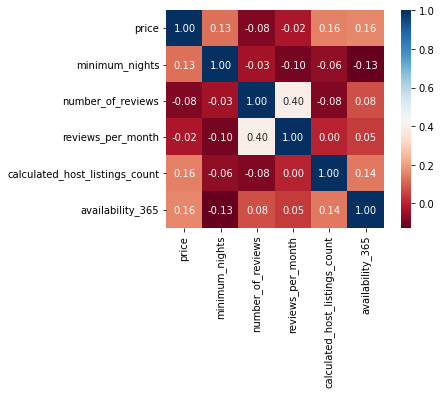

In [21]:
# plotar um heatmap a partir das correla√ß√µes

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);




> As vari√°veis em geral possuem **correla√ß√£o baixa**, por√©m h√° uma correla√ß√£o significativa, j√° esperada, entre `number_of_reviews` e `reviews_per_months`.


### **Qual a categoria de im√≥vel que √© mais alugado, pelo Airbnb, em Edimburgo?**

Podemos verificar isto facilmente. Veja o c√≥digo abaixo:

In [22]:
# qual tipo de im√≥vel √© o mais alugado?

df_clean.room_type.value_counts()

Entire home/apt    3399
Private room       1431
Hotel room           53
Shared room           7
Name: room_type, dtype: int64

In [23]:
# mostrar a quantidade de cada tipo de im√≥vel dispon√≠vel

most_frequent_rent = df_clean.room_type.value_counts()

print("O tipo de im√≥vel mais alguado √© o 'Entire home/apt' com {}"
      .format(most_frequent_rent[0]))

O tipo de im√≥vel mais alguado √© o 'Entire home/apt' com 3399


In [24]:
# mostrar a porcentagem de cada tipo de im√≥vel dispon√≠vel

df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.673283
Private room       0.307029
Hotel room         0.015457
Shared room        0.004230
Name: room_type, dtype: float64

### **Qual a localidade mais cara do dataset?**

Conhe√ßo pouco sobre os bairros da cidade de Edimburgo, ent√£o irei me ater somente aos resultados da an√°lise.



In [25]:
# ver m√©dia de pre√ßos por bairros na cidade

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Carrick Knowe                                128.800000
New Town West                                125.695402
New Town East and Gayfield                   113.939394
Old Town, Princes Street and Leith Street    111.319422
Fairmilehead                                 111.000000
Deans Village                                109.785992
Western Harbour and Leith Docks              107.962963
Canongate, Southside and Dumbiedykes         103.924855
Canonmills and New Town North                103.676056
Meadows and Southside                        103.024096
Name: price, dtype: float64



> **Os bairros com maior m√©dia de pre√ßos da cidade seriam:**
1.  *Carrick Knowe*
2.  *New Town West*


In [26]:
# Verificar a quantidade de im√≥veis dos 2 primeiros bairros

print(df_clean[df_clean.neighbourhood == 'Carrick Knowe'].shape)
print(df_clean[df_clean.neighbourhood == 'New Town West'].shape)

(5, 16)
(174, 16)


## **Distribui√ß√£o por Latitute e Longitude em fun√ß√£o dos Pre√ßos**

> O gr√°fico de dispers√£o abaixo, plotado em fun√ß√£o das latitudes e longitudes, nos mostra uma distribui√ß√£o bem razo√°vel de pre√ßos ao longo da extens√£o territorial da cidade. Com um ac√∫mulo maior de im√≥veis, e tamb√©m pre√ßos mais altos ao centro do mapa, regi√£o pr√≥xima ao ***castelo de Edimburgo***.


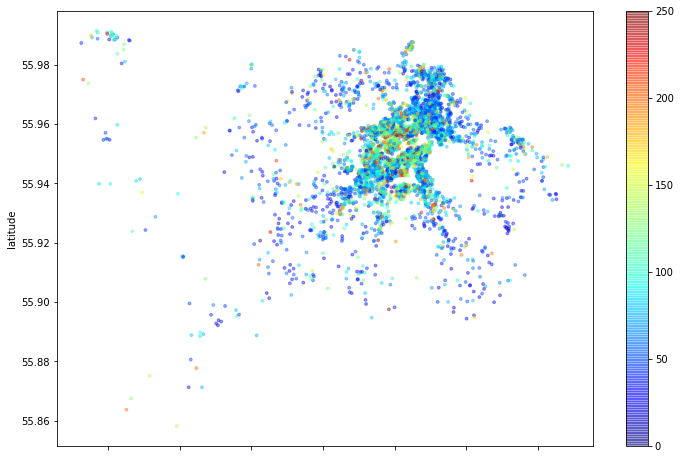

In [27]:
# plotar os im√≥veis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [28]:
# utilizando o folium para um mapa interativo

edinburgh_map = folium.Map(location=[55.9494, -3.16028], zoom_start= 10)

coordinates= []
for x, y in zip(df_clean.latitude, df_clean.longitude):
    coordinates.append([x,y])
    
edinburgh_map.add_child(plugins.MarkerCluster(coordinates))

edinburgh_map

# para visualiza√ß√£o do mapa gerado, abra este notebook no google colab.

### **Qual √© a m√©dia do m√≠nimo de noites para aluguel (minimum_nights)?**

In [29]:
# ver a m√©dia da coluna `minimum_nights``

media_noites_minimas = df_clean.minimum_nights.mean()

print("A m√©dia do m√≠nimo de noites para aluguel √© de cerca {:.2f} noites".format(media_noites_minimas))

A m√©dia do m√≠nimo de noites para aluguel √© de cerca 2.07 noites


## **Conclus√µes e Insights**

Em suma, podemos dizer que:

* Em rela√ß√£o ao *dataset original*, ap√≥s a limpeza, reduzimos um percentual de **20.44% nas entradas**.

* Em rela√ß√£o ao *dataset original*, ap√≥s a limpeza, reduzimos um percentual de **11.11% nas vari√°veis**.

* A *m√©dia de pre√ßos* dos alugu√©is na cidade gira em torno de **¬£91.92**.

* Os *bairros* com maior m√©dia de pre√ßos da cidade seriam: **Carrick Knowe** e **New Town West**. Destaque para esta √∫ltimo bairro, pois ele fica pr√≥ximo a pontos tur√≠sticos da cidade.

* A m√©dia do *m√≠nimo de noites* na cidade √© cerca de **2 noites**.<br><br>

Por fim, acredito que esta an√°lise explorat√≥ria obteve resultados razo√°veis e em concord√¢ncia com a realidade da cidade, em termos tur√≠sticos.

Numa pr√≥xima an√°lise irei utilizar o dataset mais completo disponibilizado pelo Airbnb.<br><br>

_**Agrade√ßo pelo seu tempo!**_ üôÇ



---

